In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')
emdat.head()

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


In [ ]:
# 災害タイプ別死亡者の合計を計算し、ランキングを作成
death_ranking = emdat.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False)
print("災害タイプ別死亡者ランキングトップ10:")
#上位10件を表示
print(death_ranking.head(10))

災害タイプ別死亡者ランキングトップ10:
Disaster Type
Drought                11734272.0
Epidemic                9623111.0
Flood                   7016630.0
Earthquake              2409975.0
Storm                   1421623.0
Extreme temperature      306324.0
Volcanic activity         86945.0
Mass movement (wet)       69393.0
Wildfire                   5349.0
Mass movement (dry)        4502.0
Name: Total Deaths, dtype: float64


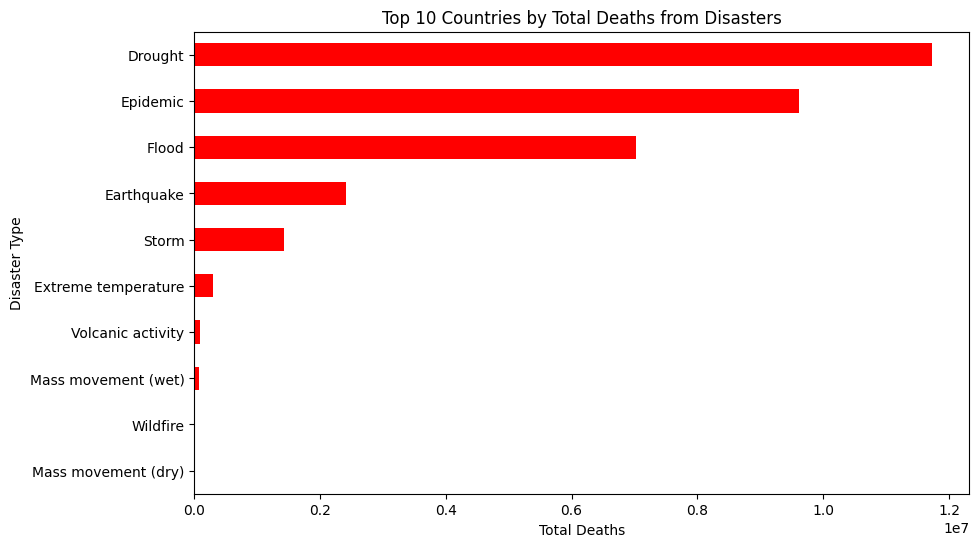

In [ ]:
# 可視化: 災害タイプ別死亡者ランキングトップ10の棒グラフ
top_10_deaths = death_ranking.head(10)
# Plotting
plt.figure(figsize=(10, 6))
#カラーとタイトルを追加
top_10_deaths.plot(kind='barh', color='red')
#ラベルとタイトルを追加
plt.xlabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.gca().invert_yaxis()  # Highest first
plt.show()